# Exploring KNMI Climate Explorer using filters

![image](https://i2.wp.com/i53.tinypic.com/245ftih.jpg)


Learned how to bring in a NetCDF file!! And all about time series and filters! WOO!! - Definitely my favorite notebook assignment

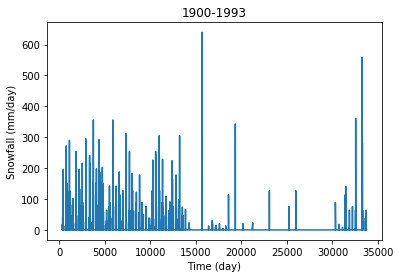

In [2]:
#Dataset from KNMI (https://climexp.knmi.nl/getstations.cgi)
#Precipitation (mm/day) 
#Cape Florida, FL
#Lat: 26N lon: 80W

import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal

q=Dataset('SnowfallJersey.nc','r',format='NETCDF4')  
q.variables 
t = np.array(q.variables['time'])   #time
R = np.array(q.variables['SNOW'])   #Precipitation
R[R==3e+33]=np.nan                  #Remove nans
t = t[~np.isnan(R)]
R = R[~np.isnan(R)]
#R.shape
#print(R)
plt.plot(t,R)
plt.xlabel('Time (day)');plt.ylabel('Snowfall (mm/day)');
plt.title('1900-1993');

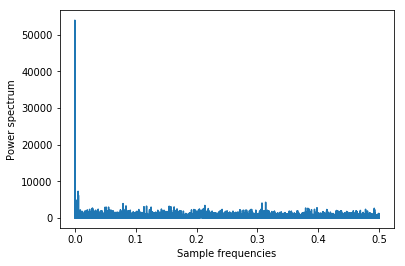

In [3]:
#Calculate the power spectrum of the time series
#The power spectrum answers the question “How much of the signal is at a frequency ω


f, Pxx = signal.periodogram(R) # Daily periodicity
plt.plot(f,Pxx)
plt.ylabel('Power spectrum');plt.xlabel('Sample frequencies');

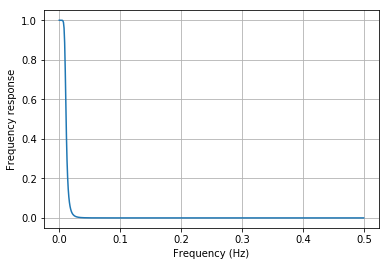

In [26]:
#Identify the dominant frequency and create a low pass filter to remove the seasonality

from scipy.signal import butter, lfilter
from scipy.signal import freqz
import matplotlib.pyplot as plt
nyq=0.5
f=0.01
b, a = butter(5,f/nyq, btype='low')      # low-pass filter, f/nyq to normalize the frequency with Nq;
# b and a are numerator and denominator of IIR filter (Infinite impulse response) as opposed to FIR
w, h = freqz(b, a)
# h is the frequency response and w is the normalized frequencies at which h is calculated

plt.plot((nyq / (1*np.pi)) * w, abs(h))

# abs(h) because h is complex, w is converted back into the sampling frequency to obtain the following plot
plt.xlabel('Frequency (Hz)')
plt.ylabel('Frequency response')
plt.grid(True)

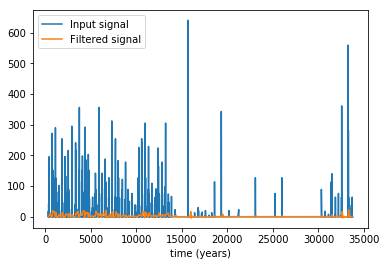

In [27]:
plt.figure()
plt.plot(t,R, label='Input signal')
y = lfilter(b, a, R)
#lfilter is a causal approach to filter signal only in forward direction, so there is a lag in phase with the original signal
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (years)')
plt.legend(loc='upper left')
plt.show()

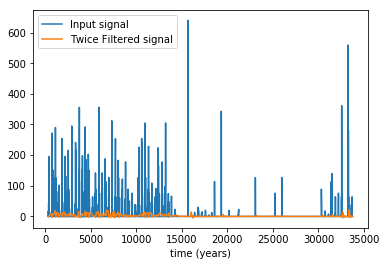

In [28]:
plt.figure()
plt.plot(t,R, label='Input signal')
y1 = lfilter(b, a, y)
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (years)')
plt.legend(loc='upper left')
plt.show()

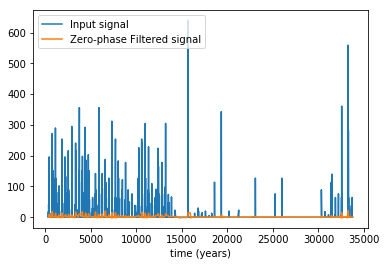

In [29]:
from scipy import signal
plt.figure()
plt.plot(t,R, label='Input signal')
y2 = signal.filtfilt(b, a, R)
#filtfilt is a non-causal approach to filter a signal forward and backward giving a zero-phase filtering 
#i.e. doesn't shift the signal in forward or backward direction as it filters
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (years)')
plt.legend(loc='upper left')
plt.show()

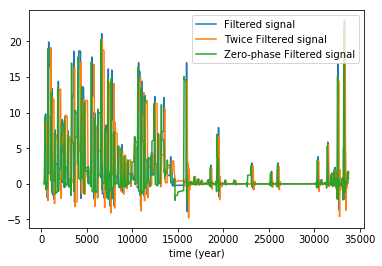

In [30]:
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper left')
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper left')
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper right')
plt.show()

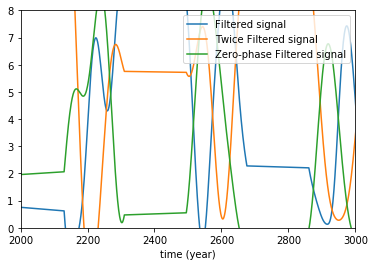

In [31]:
plt.plot(t, y, label='Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper left')
plt.plot(t, y1, label='Twice Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper left')
plt.plot(t, y2, label='Zero-phase Filtered signal')
plt.xlabel('time (year)')
plt.legend(loc='upper right')
plt.ylim([0,8]);plt.xlim([2000,3000])
plt.show()